# Problem Statement

The transmission line is the most crucial part of the power system. The requirement of power and its allegiance has grown up exponentially over the modern era, and the prominent role of a transmission line is to transmit electric power from the source area to the distribution network. The electrical power system consists of so many complex dynamic and interacting elements that are always prone to disturbance or an electrical fault.

The amount of electricity fed into the electricity grid must always be equal to the amount of electricity consumed, otherwise there's a black-out.

With the increase in renewable production, which can vary greatly depending on the weather, this has become much more complex.

Conventional power plants have to compensate for these constant fluctuations, especially since it is not possible to store electricity in large quantities over a long period of time.

To predict the fault in the Grid, Machine Learning Model is Being built.

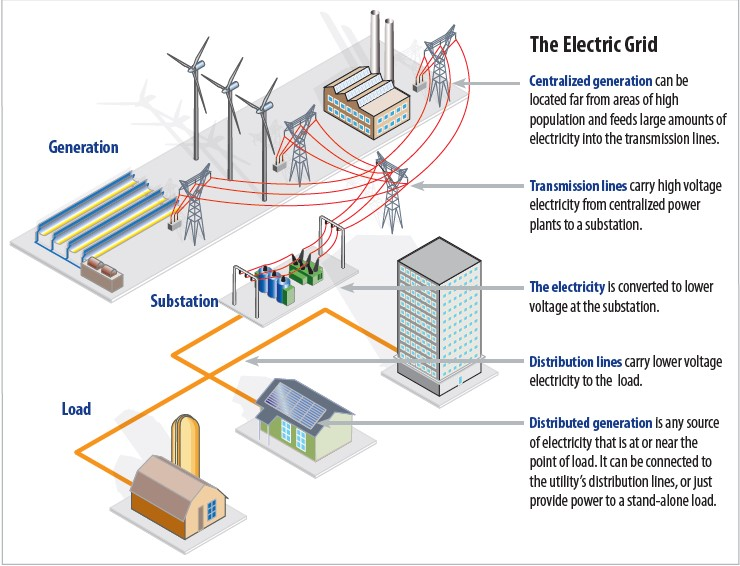

In [5]:
import warnings 
warnings.filterwarnings( "ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

In [6]:
from google.colab import files
uploaded = files.upload()
import io

Saving classData.csv to classData.csv


In [7]:
# df=pd.read_csv('classData.csv') # Reading Data
df=pd.read_csv(io.BytesIO(uploaded['classData.csv']))

In [8]:
df.head() # Sample Dataset

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [9]:
df['fault_type']=df['G'].astype('str')+df['C'].astype('str')+df['B'].astype('str')+df['A'].astype('str')

In [10]:
df=df.drop(['G','C','B','A'], axis=1) # Dropping G, C, B, A features due to already combined as fault type.

In [11]:
df.head() # Sample Dataset

,Ia,Ib,Ic,Va,Vb,Vc,fault_type
0,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


In [12]:
X = df.drop(['fault_type'], axis=1)
Y = df['fault_type']

In [13]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

Y = le.fit_transform(Y)

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=123,test_size=0.30)

In [15]:
ss=StandardScaler() 
# we are scaling the data for ANN & KNN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

In [16]:
knn = KNeighborsClassifier()
nb =  GaussianNB()
gbm = GradientBoostingClassifier(random_state=123)
svc = SVC(random_state=123,probability=True,decision_function_shape='ovo')
xgb =  XGBClassifier(random_state=123)
ann = MLPClassifier(hidden_layer_sizes=(500),random_state=123, max_iter=10000)#you are free to tweak the layer sizes
rfc = RandomForestClassifier(random_state=123)
ada = AdaBoostClassifier(random_state=123)
lda = LinearDiscriminantAnalysis()

models=[xgb,svc,gbm,nb,knn,lda,ada,rfc,ann]

log_loss_train=[]
log_loss_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != knn and i != ann) :
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        log_loss_train.append(log_loss(y_train,i.predict_proba(x_train)))
        log_loss_test.append(log_loss(y_test,i.predict_proba(x_test)))
 
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        log_loss_train.append(log_loss(y_train,i.predict_proba(x_train)))
        log_loss_test.append(log_loss(y_test,i.predict_proba(x_test)))
        
print(pd.DataFrame({'Training Score':scores_train,'Test Score': scores_test, 'Train LogLoss':log_loss_train,'Test LogLoss': log_loss_test},
            index=['XGB','SVC','GBM', 'NB','KNN','LDA','Ada Boost','Random Forest', 'ANN']))

               Training Score  Test Score  Train LogLoss  Test LogLoss
XGB                  0.869866    0.849936       0.246073      0.265084
SVC                  0.759724    0.749046       0.397924      0.391794
GBM                  0.920938    0.844002       0.194109      0.249663
NB                   0.792439    0.793557       0.651253      0.734302
KNN                  0.876954    0.811361      18.339511     18.049890
LDA                  0.356779    0.352692       1.708473      1.718245
Ada Boost            0.706652    0.703264       1.284253      1.289799
Random Forest        1.000000    0.872827       0.065850      0.306543
ANN                  0.867321    0.863501      25.712668     25.223313


In [1]:
## Here we can see that XG Boost, SVC are performing well.
## Random Forest and GBM model is overfitting and LDA not able to learnt very poor it becasue classes are not well seprated.
## We will tune XG Boost, SVC, GBM and KNN for checking whether these can further improve or not, also tunning Random Forest to avoid overfitting.

## XG Boost Tuned

In [17]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": [100,150,200],
    "colsample_bytree":[0.7,1],
    "colsample_bylevel":[0.7,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(x_train, y_train)

XGBClassifier(colsample_bylevel=0.7, n_estimators=150,
              objective='multi:softprob', random_state=1)

In [18]:
print(grid_obj.best_params_)

{'colsample_bylevel': 0.7, 'colsample_bytree': 1, 'n_estimators': 150}


## GBM Tuned

In [19]:
gbc_tuned = GradientBoostingClassifier(random_state=123)
parameters = {
    "n_estimators": [100,150,200],
    "subsample":[0.7,1],
    "max_features":[0.7,1]
}
grid_search = GridSearchCV(estimator =gbc_tuned, param_grid = parameters, cv = 5,n_jobs=-1,scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'max_features': [0.7, 1],
                         'n_estimators': [100, 150, 200],
                         'subsample': [0.7, 1]},
             scoring='accuracy')

In [20]:
print(grid_search.best_params_)

{'max_features': 0.7, 'n_estimators': 200, 'subsample': 0.7}


In [ ]:
best_model_gbm = grid_search.best_estimator_

## RF Tuned

In [23]:
param_grid = {
     'max_depth': [5,7,10],
    'max_features': [3,5,7],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100,200,300]
}

rfcl=RandomForestClassifier(random_state=123)

grid_search_rf=GridSearchCV(estimator=rfcl, param_grid=param_grid, cv=5,n_jobs=-1,scoring='accuracy')

In [24]:
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10], 'max_features': [3, 5, 7],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [25]:
print(grid_search_rf.best_params_)

{'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 50, 'n_estimators': 100}


In [ ]:
best_model_rf = grid_search_rf.best_estimator_

## KNN Tuned

In [ ]:
ac_score=[]

for k in range(1,20,2):
    KNN = KNeighborsClassifier(n_neighbors= k )
    KNN.fit(x_train_scaled, y_train)
    score=KNN.score(x_test_scaled, y_test)
    ac_score.append(score)

MCE= [1- x for x in ac_score ]

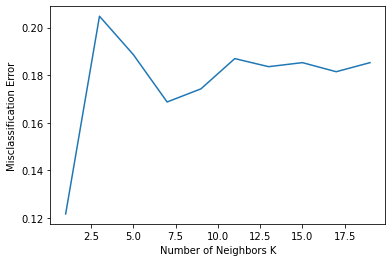

In [ ]:
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
KNN_model=KNeighborsClassifier(n_neighbors= 7)
KNN_model.fit(x_train_scaled, y_train)
KNN_model.score(x_train_scaled, y_train)

0.896037804434751

In [ ]:
KNN_model.score(x_test_scaled, y_test)

0.8312844425604069

In [32]:
## With the best value of K, still performance is not improved much.

In [ ]:
loss_train_knn = log_loss(y_train, KNN_model.predict_proba(x_train))
loss_train_knn

17.925747102406337

## SVC Tuned

In [27]:
svc= SVC(decision_function_shape='ovo',probability=True)
param ={"kernel":['poly', 'rbf', 'sigmoid' ],
                    } 
svm_grid = GridSearchCV(svc , param_grid=param , cv=5,n_jobs=-1,scoring='accuracy' )
svm_grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=SVC(decision_function_shape='ovo', probability=True),
             n_jobs=-1, param_grid={'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [29]:
print(svm_grid.best_params_)

{'kernel': 'rbf'}


In [28]:
best_model_svm = svm_grid.best_estimator_

## Models with Best Param

In [30]:
gbm = GradientBoostingClassifier(max_features= 0.7, n_estimators= 200, subsample= 0.7,random_state=123)
svc = SVC(random_state=123,probability=True,decision_function_shape='ovo',kernel= 'rbf')
xgb =  XGBClassifier(colsample_bylevel= 0.7, colsample_bytree= 1, n_estimators= 150,random_state=123)
rfc = RandomForestClassifier(max_depth= 10, max_features= 3, min_samples_leaf=5, min_samples_split= 50, n_estimators= 100,random_state=123)


models=[xgb,svc,gbm,rfc]

log_loss_train=[]
log_loss_test=[]
scores_train=[]
scores_test=[]

for i in models:
  i.fit(x_train,y_train)
  scores_train.append(i.score(x_train, y_train))
  scores_test.append(i.score(x_test, y_test))
  log_loss_train.append(log_loss(y_train,i.predict_proba(x_train)))
  log_loss_test.append(log_loss(y_test,i.predict_proba(x_test)))
 
            
print(pd.DataFrame({'Training Score':scores_train,'Test Score': scores_test, 'Train LogLoss':log_loss_train,'Test LogLoss': log_loss_test},
            index=['XGB','SVC','GBM', 'Random Forest']))

               Training Score  Test Score  Train LogLoss  Test LogLoss
XGB                  0.889131    0.849513       0.204982      0.233163
SVC                  0.759724    0.749046       0.397924      0.391794
GBM                  0.956198    0.843154       0.145070      0.231215
Random Forest        0.900400    0.826198       0.227964      0.255246


In [35]:
Models=(pd.DataFrame({'Training Score':scores_train,'Test Score': scores_test, 'Train LogLoss':log_loss_train,'Test LogLoss': log_loss_test},
            index=['XGB','SVC','GBM', 'Random Forest']))

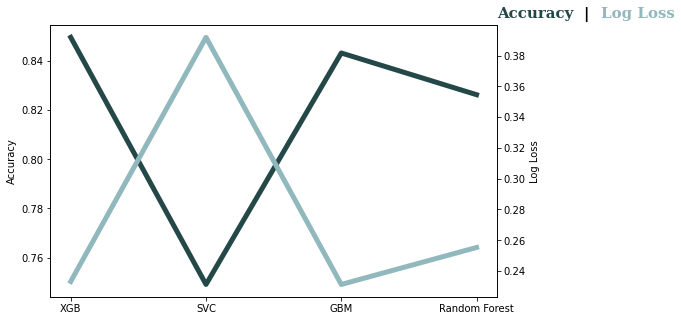

In [51]:
fig, ax1 = plt.subplots(figsize=(8, 5))
fig.text(.9, 0.9, 'Accuracy', fontweight="bold", fontfamily='serif', fontsize=15, color='#244747')
fig.text(1.05, 0.9, "|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(1.08,0.9, 'Log Loss', fontweight="bold", fontfamily='serif', fontsize=15, color='#91b8bd')

ax1.plot(Models.index, Models['Test Score'], '-', color='#244747', linewidth=5)
ax1.set_ylabel('Accuracy')

ax2 = ax1.twinx()
ax2.plot(Models.index, Models['Test LogLoss'], '-', color='#91b8bd', linewidth=5)
ax2.set_ylabel('Log Loss')

plt.xlabel('Models')
plt.show()


In [52]:
## After tuning XG Boost loss is reduced to lowest and giving highest frequency.
## GBM still over fitting even after tuning
##  RF Model is now performing well after tuning.